# Семинар 5. Работа с Atoti, Linux

## Задание по Atoti

- Прочитать данные из базы данный nanoedu: таблицы sp_vuz, sp_city, sp_region, sp_fo, table2_kady 
- Создать гиперкуб путем соединения таблиц sp_vuz, table2_kadry
- Задание на аналитику

In [1]:
import atoti as tt
session = tt.Session()

Welcome to atoti 0.6.5!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [8]:
shops = session.read_csv("shops.csv", keys=["Shop ID"])

In [9]:
shops.head()

,City,State or region,Country,Shop size
Shop ID,,,,
shop_0,New York,New York,USA,big
shop_1,Los Angeles,California,USA,medium
shop_2,San Diego,California,USA,medium
shop_3,San Jose,California,USA,medium
shop_4,San Francisco,California,USA,small


In [10]:
sales=session.read_csv("sales.csv", keys=["Sale ID"])

In [11]:
sales.head()

,Date,Shop,Product,Quantity,Unit price
Sale ID,,,,,
S000000000,2021-02-04,shop_0,TAB_0,1.0,210.0
S000000001,2021-02-03,shop_1,TAB_1,1.0,300.0
S000000002,2021-02-02,shop_2,CHA_2,2.0,60.0
S000000003,2021-02-01,shop_3,BED_3,1.0,150.0
S000000004,2021-01-31,shop_4,BED_4,3.0,300.0


In [14]:
fo=session.read_csv("fo.csv",encoding='utf-8',separator=',',keys=["id"])

In [15]:
fo.head()

,name
id,
1,Дальневосточный
2,Приволжский
3,Северо-Западный
4,Северо-Кавказский
5,Сибирский


In [16]:
city=session.read_csv("city.csv",encoding='utf-8',separator=',',keys=["id"])
city.head()

,name,sp_region_id
id,,
1,Адыгейск,78
2,Майкоп,78
3,Горно-Алтайск,42
4,Алейск,43
5,Барнаул,43


In [17]:
cube = session.create_cube(shops)

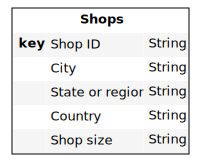

In [18]:
cube.schema

In [19]:
h = cube.hierarchies
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Shops', _hierarchies=..., _measures=Measures())>, _cube_name='Shops')

In [20]:
l = cube.levels
l

Levels()

In [21]:
m = cube.measures
m

Measures()

In [22]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [23]:
shops.join(sales,mapping={"Shop ID":"Shop"})

In [24]:
cube

Cube(_name='Shops', _hierarchies=Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of ...>, _cube_name='Shops'), _measures=Measures())

In [30]:
m["Price.Mean"]=tt.agg.mean(sales["Unit price"])
m["Price.Sum"]=tt.agg.sum(sales["Unit price"])
m["Price.std"]=tt.agg.std(sales["Unit price"])
m

Measures()

In [31]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Задание по Linux

### Работа с файлами

1. В рабочем каталоге создайте создайте папку «Work», внутри которой еще две папки «Контрольная работа №1!» «ФИО».
2. Установите на папку «Контрольная работа №1!» права для владельца и группы владельца: чтение, запись, выполнение, SUID и SGID, для остальных права запись; на папку «ФИО» установите  sticky bit, а также для владельца права только на запись.
3. Создайте в папке «Work» три файла «Text @1», «Text $2», «Text  #3».
4. Без использования текстового редактора запишите в файл «Text @1» следующий текст: 

«Птица говорун отличается умом и сообразительностью!»

с новой строки: 
«Отличается умом, отличается сообразительностью...»

5. Без использования текстового редактора скопируете содержимое файла «Text @1» в файл «Text $2».

6. Переместите файл «Text $2» в папку «Контрольная работа №1!» и скопировать файл «Text @1» в папку «ФИО».

7. Сожмите файлы «Text @1», «Text  #3» с помощью утилиты gzip и добавьте их в архив «MyAchiv» с помощью утилиты tar.

8. Добавьте в файл «Text  #3» первую строку из файла  «Text @1» без использования текстового редактора, а далее в конец «Text  #3» добавьте строку «Будь осторожен! Преступник вооружен!»

9. В папке «ФИО» создайте файл «Result_one», в который запишите в обратном порядке содержимое файла «Text @1»

10. Переименуйте файл «Result_one» в «Result_two»

11. В папке «Контрольная работа №1!» создайте файл «Result_3», в который запишите содержимое файлов и папок папки «ФИО», начинающихся в своем названии с буквы «T».

12. Добавьте, без использования текстового редактора, в конец файла «» полную информацию о ядре системы и текущую дату.

### Скрипты

- Создать скрипт, добавляющий в выбранную папку 10 файлов со случайным названием и случайно назначая права доступа к файлам его  владельцу. В качестве владельца файлов назначить student01.

- Создать скрипт, вкладывающий папку в папку заданное количество раз. Количество раз и имя папки ввести с клавиатуры.

- Разработать скрипт, который периодически проводит вычисления значения функции f(n)=sin(n), где n — это текущий шаг вычислений (данный шаг каждый раз увеличивается). Результаты расчетов накапливать в файле Result.my домашнего каталога.


- Разработать скрипт, который запускает заданное количество раз (данное количество задается параметром скрипта) программу xcalc (калькулятор).


- Создать скрипт, вычисляющий сумму ряда exp(1)+exp(2)+exp(3)+exp(4)+...+exp(n), причем n необходимо задавать в качестве параметра скрипта.


- Ввести с клавиатуры n чисел (n задается параметром скрипта), рассчитать их среднее арифметическое.


- Ввести с клавиатуры n чисел (n задается параметром скрипта), рассчитать их дисперсию.


- Разработать скрипт, который через каждые 30 секунд создает дамп текущих запущенных процессов (включая демоны), сохраняя (с накоплением) их в файл Result. Дампы разного времени должны отделяться друг от друга символом ###.


- В shell-скрипте компьютер загадывает n (вводится с клавиатуры) случайных чисел и выводит на экран их среднее арифметическое.

- Разработать скрипт, который создает в домашней директории заданное количество (количество запрашивается при работе скрипта) скрытых файлов, после чего находит в домашней директории все скрытые файлы и сохраняет их в файл Result.